<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Regularization_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Generate Data:

In [ ]:
X,y  = make_moons(100,noise=0.25,random_state=2)

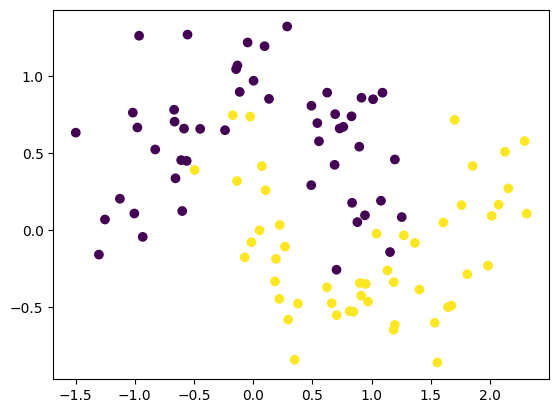

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Regression Model:

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # As we know for the output layer in regression activation function is linear
adam = Adam(learning_rate=0.01)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Fit the model:

In [ ]:
model.compile(optimizer=adam,loss="binary_crossentropy",metrics=['mean_squared_error','accuracy'])

In [ ]:

history =  model.fit(X,y,epochs=1500,validation_split=0.2,verbose=0)

# Evaluate the model:

In [ ]:
from mlxtend.plotting import plot_decision_regions


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


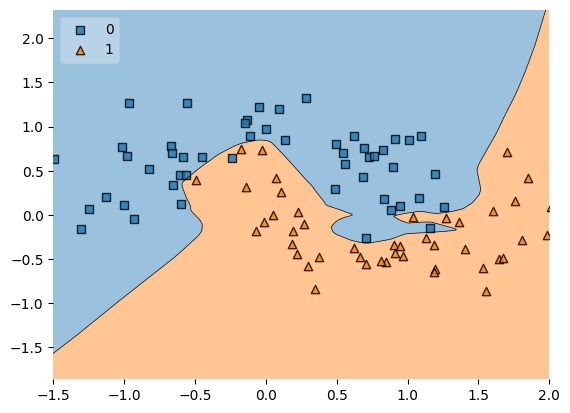

In [ ]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.xlim(-1.5,2)
plt.show()

** As we can the model is obviously overfitted so we either need to increase the amount of data, use early stopping, Dropout and Regularization.

** We know that regularization uses a Penalty Score to Reduce the value of our weight to near =~ 0.

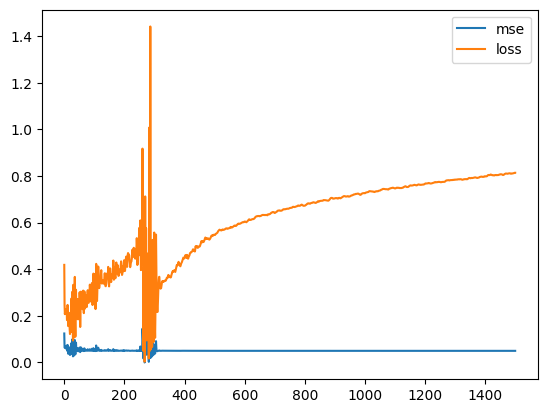

In [ ]:
plt.plot(history.history['val_mean_squared_error'],label="mse")
plt.plot(history.history['val_loss'],label="loss")
plt.legend()
plt.show()

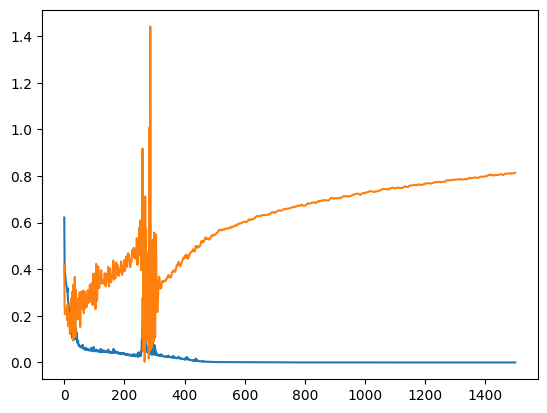

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

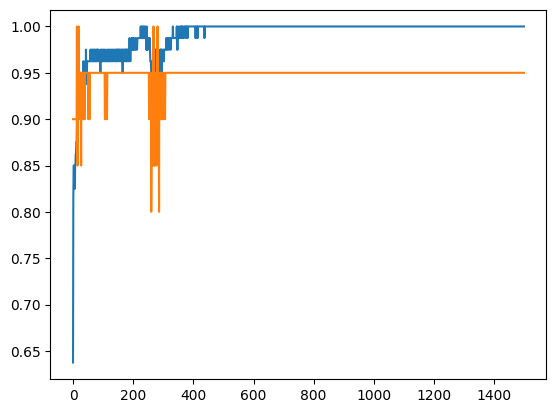

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Implement Regularization L2:

* Input the Regularization Metrics you wnat to use(L1, L2, L1L2).

* Feed the Value of Penalty to the L2 in our case its 0.03.



In [193]:
Model = Sequential()
Model.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dropout(0.25))
Model.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dropout(0.25))
Model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [194]:
adam = Adam(learning_rate=0.01)

In [195]:
Model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
Model.compile(loss="binary_crossentropy",optimizer=adam,metrics=['accuracy'])

In [197]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss",
                   min_delta=0.00001,
                   patience=50,
                   verbose=1,
                   mode="auto",
                   baseline=None,
                   restore_best_weights=True,
                   )

In [198]:
history = Model.fit(X, y, epochs=1500, validation_split = 0.2,verbose=1,callbacks=ES)

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5516 - loss: 4.2781 - val_accuracy: 0.8500 - val_loss: 2.7296
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7906 - loss: 2.5132 - val_accuracy: 0.9000 - val_loss: 1.5450
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8148 - loss: 1.4469 - val_accuracy: 0.9000 - val_loss: 0.8903
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8102 - loss: 0.9023 - val_accuracy: 0.9000 - val_loss: 0.6049
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8164 - loss: 0.6940 - val_accuracy: 0.9000 - val_loss: 0.5875
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7867 - loss: 0.6597 - val_accuracy: 0.9000 - val_loss: 0.5783
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7914 - loss: 0.6949 - val_accuracy: 0.9000 - val_loss: 0.5393
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7953 - loss: 0.6966 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


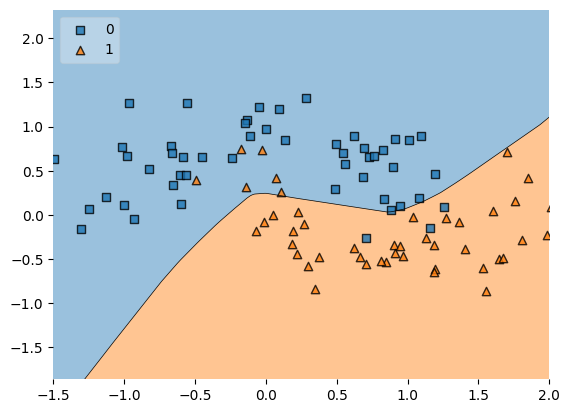

In [199]:
plot_decision_regions(X,y.astype('int'),clf=Model,legend=2)
plt.xlim(-2,3)
plt.xlim(-1.5,2)
plt.show()

** I think using all these methods like Dropout, EarlyStopping and Regularization did make our model more accurate and saved time and computation and our model is more or less perfect fit

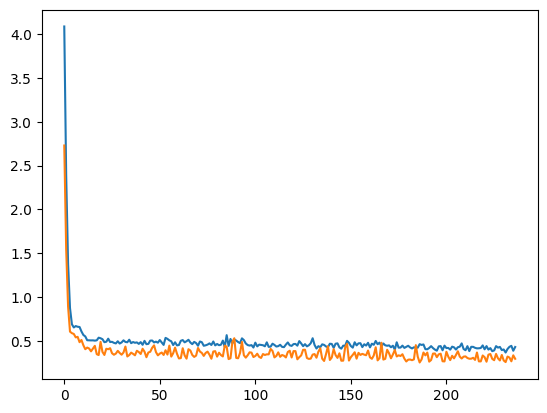

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

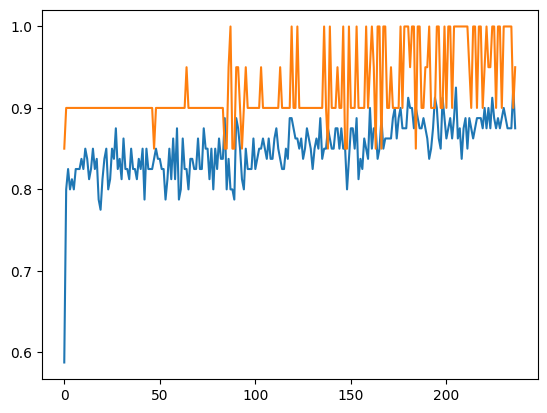

In [201]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model_weight_layer = model.get_weights()[0].reshape(256)
Model_weight_layer = Model.get_weights()[0].reshape(256)

<Axes: >

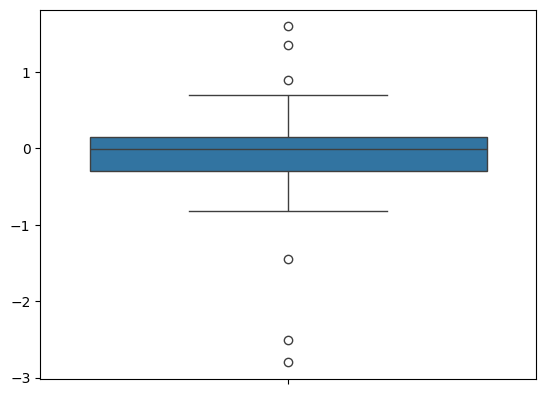

In [202]:
import seaborn as sns
sns.boxplot(model_weight_layer)

In [203]:
model_weight_layer.min()

np.float32(-2.803192)

In [204]:
Model_weight_layer.min()

np.float32(-0.3247904)

/tmp/ipython-input-2923059645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer)
/tmp/ipython-input-2923059645.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Model_weight_layer)


<Axes: ylabel='Density'>

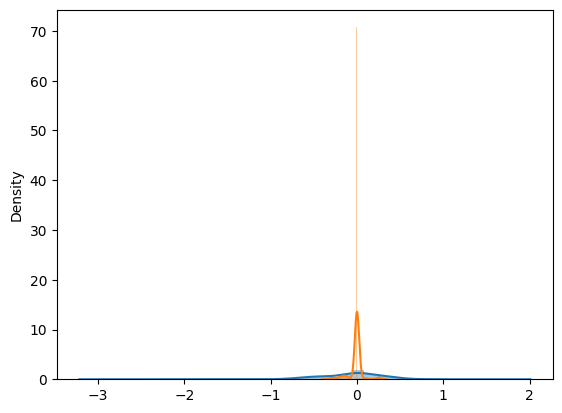

In [125]:
sns.distplot(model_weight_layer)
sns.distplot(Model_weight_layer)

# Regularization L1:

# In this Same Model we will use Dropout and Callback to get the best result and low computaional access:

In [211]:
# Creating an L1 regularization model:
model_l1 = Sequential()
model_l1.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model_l1.add(Dropout(0.25))
model_l1.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model_l1.add(Dropout(0.25))
model_l1.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [212]:
model_l1.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
adam = Adam(learning_rate=0.01)

In [214]:
model_l1.compile(loss="binary_crossentropy",optimizer=adam,metrics=['accuracy'])

# EarlyStoppping to Save computation on Epochs:

In [215]:
history = model_l1.fit(X,y,epochs=1500,validation_split=0.2,verbose=1,callbacks=ES)

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.5898 - loss: 1.8552 - val_accuracy: 0.9000 - val_loss: 1.4051
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8539 - loss: 1.3734 - val_accuracy: 0.9000 - val_loss: 1.0209
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8070 - loss: 1.1421 - val_accuracy: 0.9000 - val_loss: 0.7825
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8328 - loss: 0.9314 - val_accuracy: 0.9000 - val_loss: 0.6941
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8469 - loss: 0.7806 - val_accuracy: 0.9000 - val_loss: 0.6652
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8664 - loss: 0.7162 - val_accuracy: 0.9000 - val_loss: 0.6110
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8742 - loss: 0.6853 - val_accuracy: 0.9000 - val_loss: 0.6078
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8367 - loss: 0.6915 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


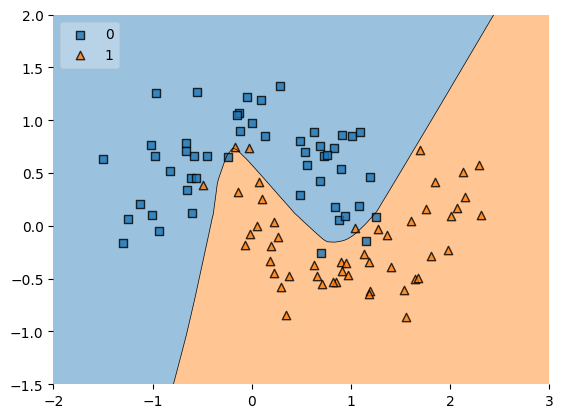

In [216]:
plot_decision_regions(X, y.astype('int'), clf=model_l1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

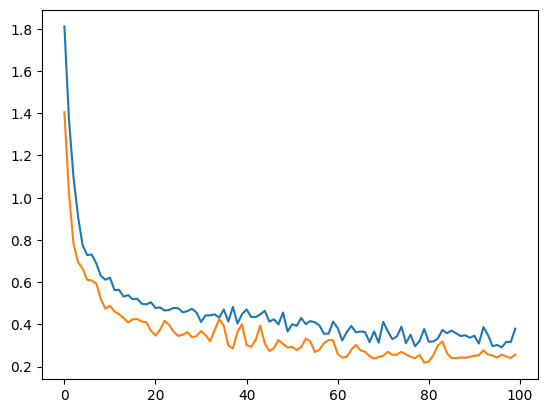

In [217]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [218]:
model_weight_layer1 = model.get_weights()[0].reshape(256)
model_l1_weight_layer1 = model_l1.get_weights()[0].reshape(256)

<Axes: >

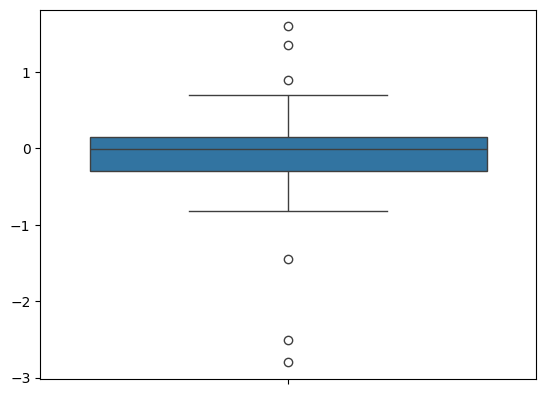

In [219]:
sns.boxplot(model_weight_layer1)

<Axes: >

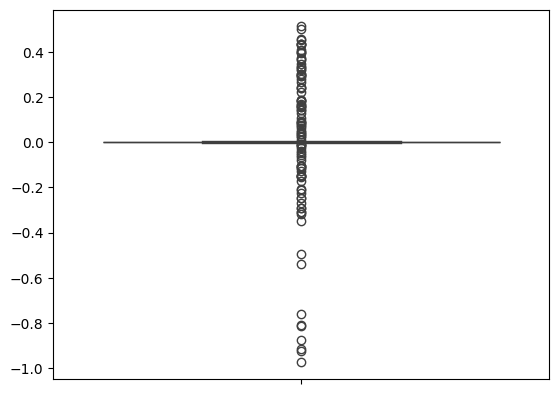

In [220]:
sns.boxplot(model_l1_weight_layer1)


In [221]:
model_weight_layer1.min()

np.float32(-2.803192)

In [222]:
model_l1_weight_layer1.min()

np.float32(-0.9752548)

/tmp/ipython-input-1697030174.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer1)
/tmp/ipython-input-1697030174.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_l1_weight_layer1)


<Axes: ylabel='Density'>

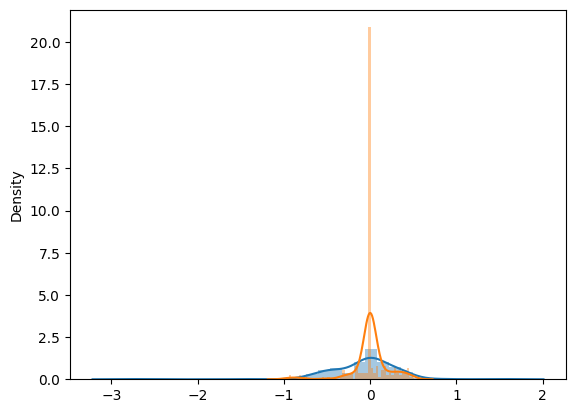

In [223]:
sns.distplot(model_weight_layer1)
sns.distplot(model_l1_weight_layer1)

In [224]:
model_l1.get_weights()[0].reshape(256)

array([ 1.27976060e-01, -2.83189886e-03, -2.70718592e-04, -3.54429038e-04,
       -8.54513855e-05, -2.58913235e-04,  7.89281097e-04,  3.82978149e-04,
       -1.02519244e-03, -1.57765893e-03, -3.11586703e-03,  4.52274263e-01,
        1.43010855e-01,  2.93866426e-01,  4.55323786e-01, -8.10269177e-01,
        2.65100151e-01, -3.25400790e-04,  8.60643049e-04,  1.02536310e-03,
       -3.92830174e-04, -3.67557704e-02, -2.03400967e-03,  4.33219790e-01,
       -6.68440654e-04,  1.57978103e-01,  1.05340208e-03,  3.31047049e-04,
       -3.86467931e-04, -1.14330673e-03, -2.90531009e-01,  3.65928620e-01,
        5.32307546e-04, -6.12085569e-05,  1.55738354e-01, -5.38382590e-01,
       -7.45668600e-04,  2.95160990e-03, -1.67591876e-04,  7.44907768e-04,
       -8.76254797e-01,  8.35937113e-02,  4.37091367e-04,  4.08609867e-01,
        1.78805349e-05,  2.78547674e-01,  3.97178829e-01, -6.13893208e-04,
       -1.69273699e-05, -2.58544530e-03,  2.24383131e-01, -6.98111602e-04,
       -2.04437994e-04, -